In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from IPython.core.display import display, HTML

In [2]:
df = pd.read_csv("/content/heart_statlog_cleveland_hungary_final.csv")

In [3]:
df.shape

(1190, 12)

In [4]:
df.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [5]:
df.describe()

age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636         0.487360   
min               0.000000     0.000000       60.000000         0.000000   
25%               0.000000     0.000000      121.000000         0.000000   
50%               0.000000     0.000000      140.500000         0.000000   
75%               0.000000     2.000000      160.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

           oldpeak     ST slope       target  
count  1190.000000  1190.000000  1190.000000  
mean      0.922773     1.624370     0.528571  
std       1.086337     0.610459     0.499393  
min      -2.600000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       0.600000     2.000000     1.000000  
75%       1.600000     2.000000     1.000000  
max       6.200000     3.000000     1.000000

In [6]:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [7]:
def plots(df, name, num, axes):
    group = df.groupby(name)
    mean = group[num].mean()
    sns.barplot(x=mean.index, y=mean, ax=axes)
    for container in axes.containers:
        axes.bar_label(container, rotation=90, label_type="center")

In [8]:
categoricals = ["sex", "chest pain type", "fasting blood sugar", "resting ecg", "exercise angina", "ST slope", "target"]

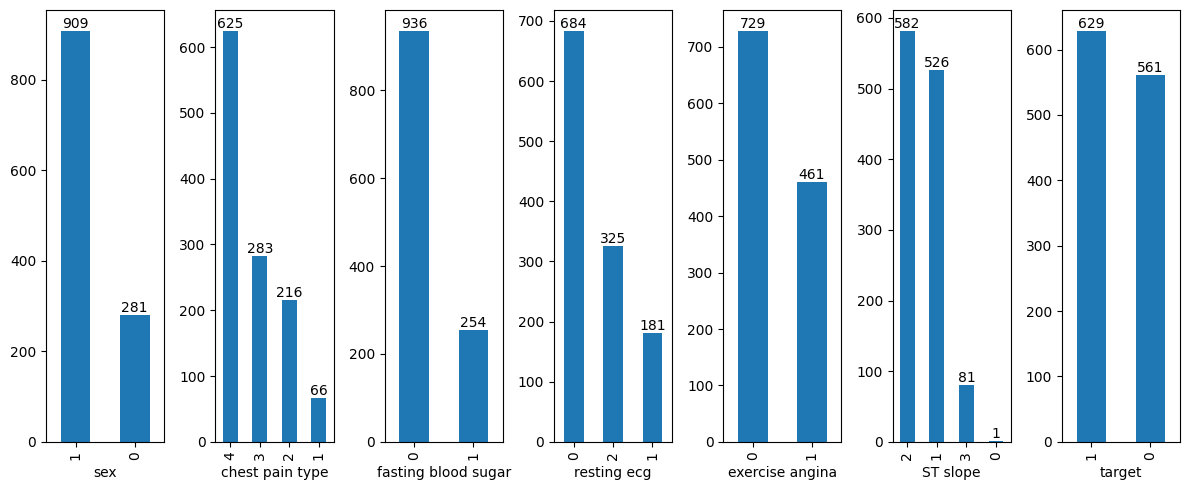

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(12, 5))
for i, j in enumerate(categoricals):
    df[j].value_counts().plot(kind="bar", ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
plt.tight_layout()
plt.show()

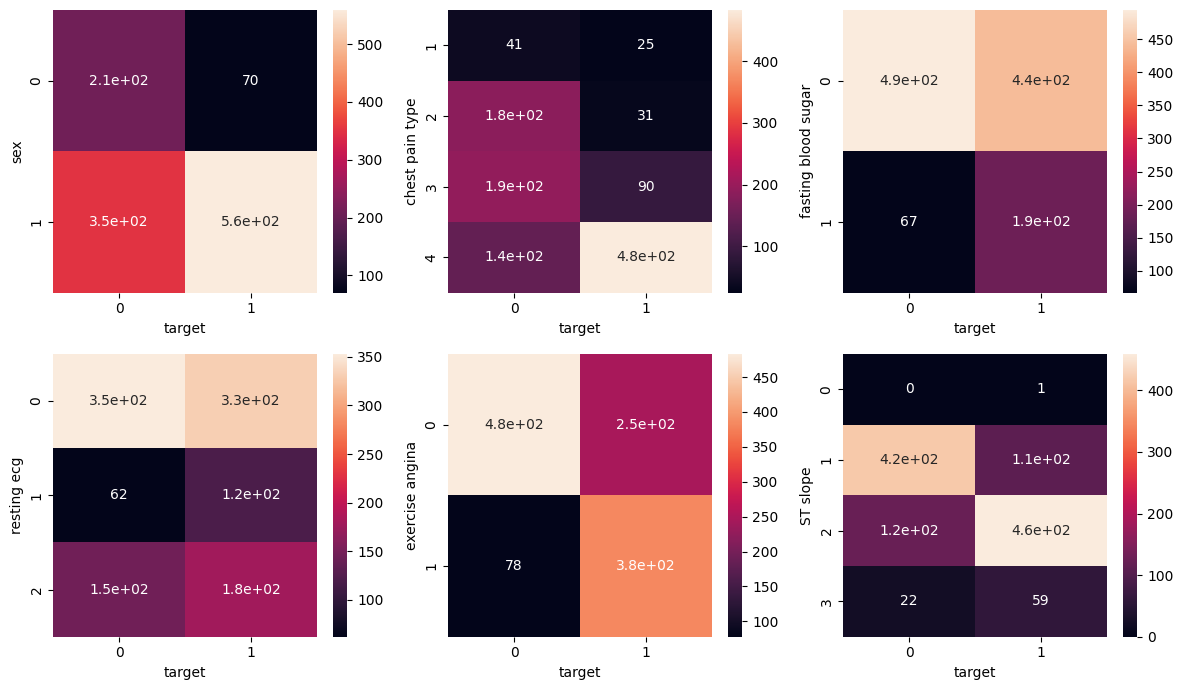

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
index = 0
for i in range(2):
    for j in range(3):
        corr = pd.crosstab(df[categoricals[index]], df[categoricals[-1]])
        sns.heatmap(corr, annot=True, ax=axes[i][j])
        index += 1
plt.tight_layout()
plt.show()

In [11]:
numericals = [i for i in df.columns if i not in categoricals]

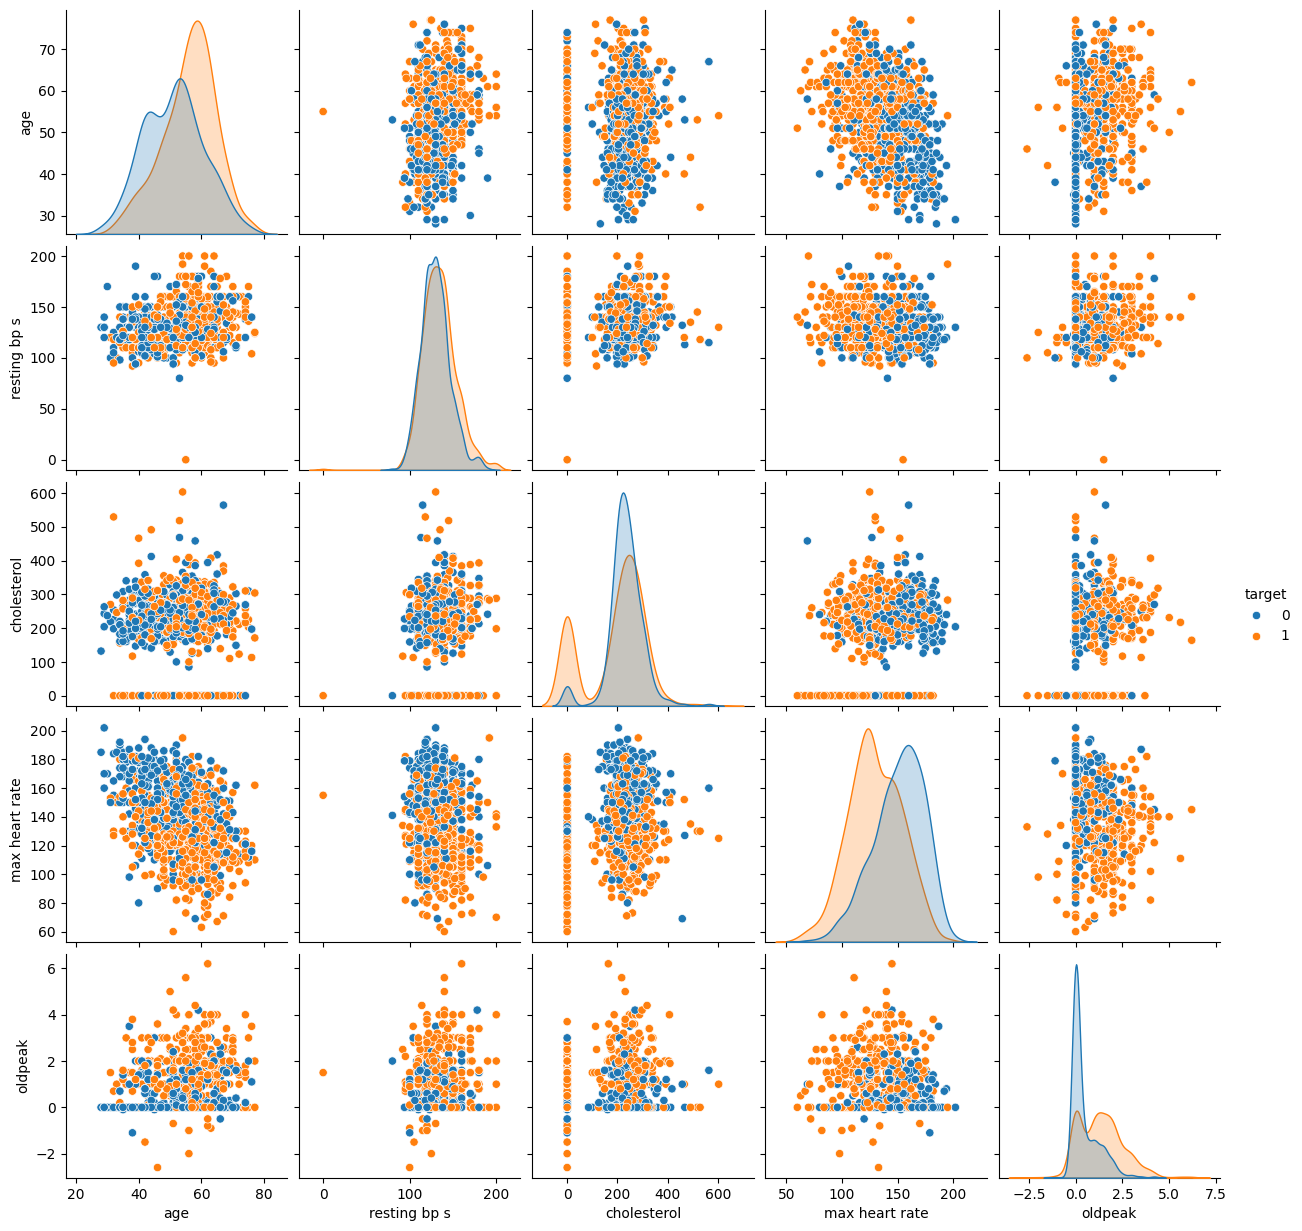

In [12]:
sns.pairplot(df, vars=numericals, hue=df.columns[-1])
plt.show()

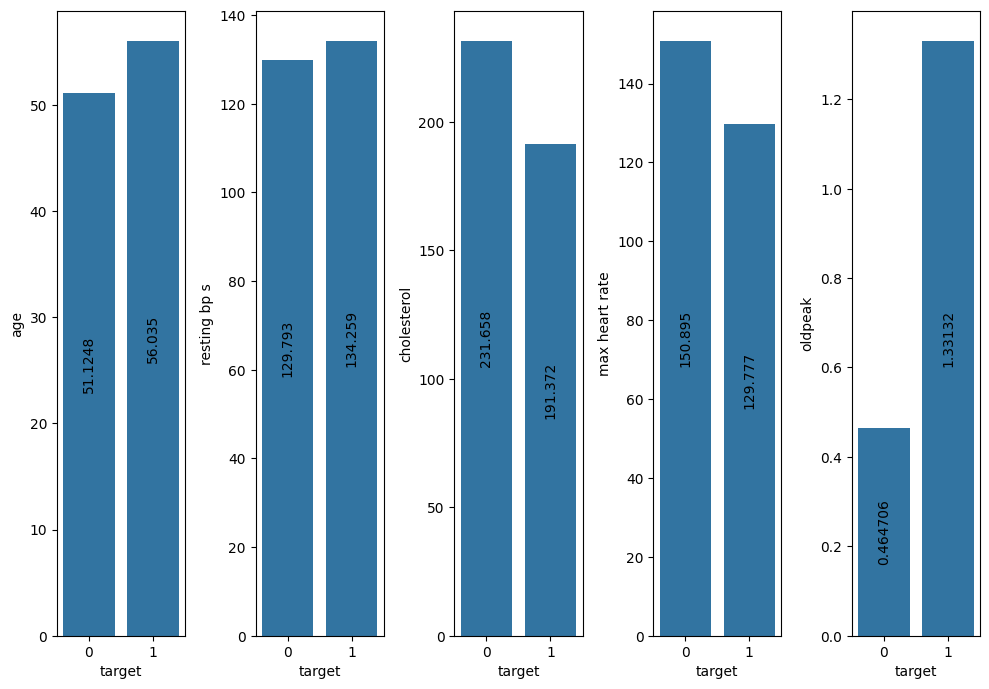

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 7))
for i, j in enumerate(numericals):
    plots(df, df.columns[-1], j, axes[i])
plt.tight_layout()
plt.show()

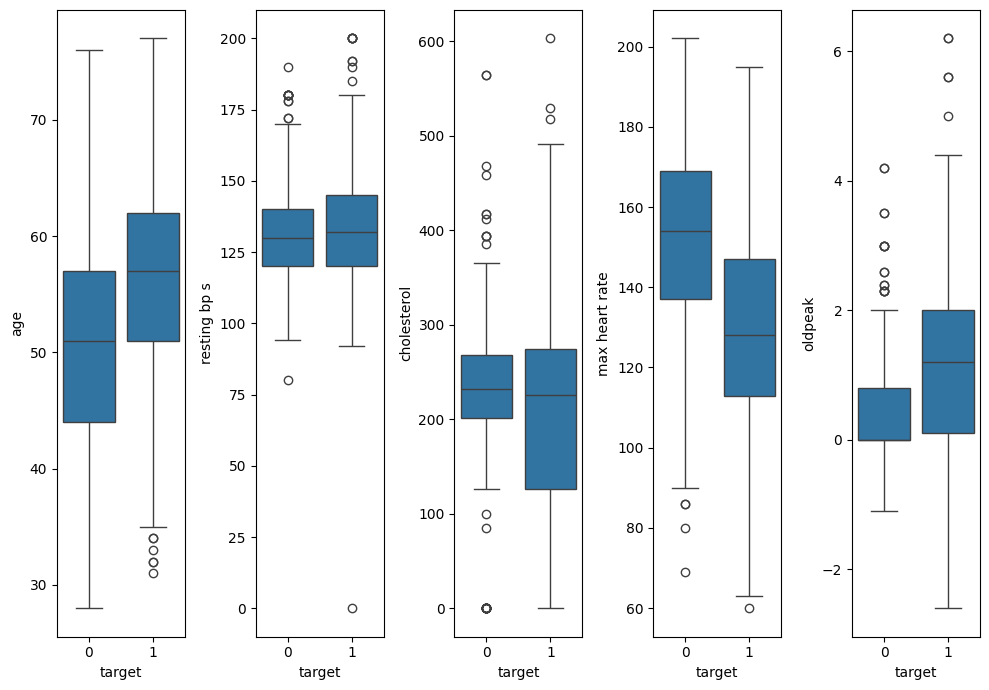

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 7))
for i, j in enumerate(numericals):
    sns.boxplot(df, x=df.columns[-1], y=j, ax=axes[i])
plt.tight_layout()
plt.show()

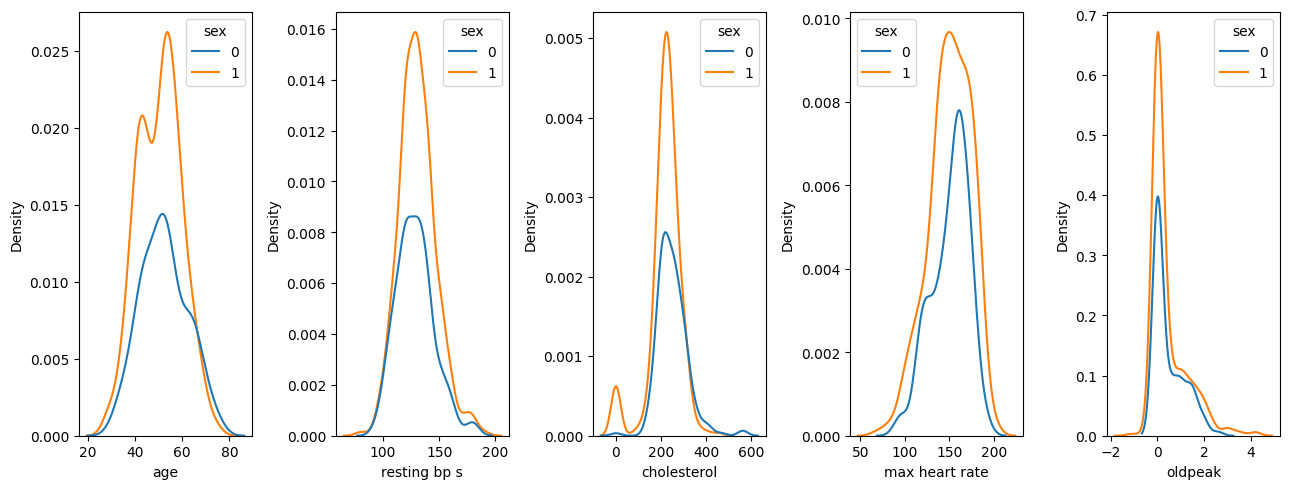

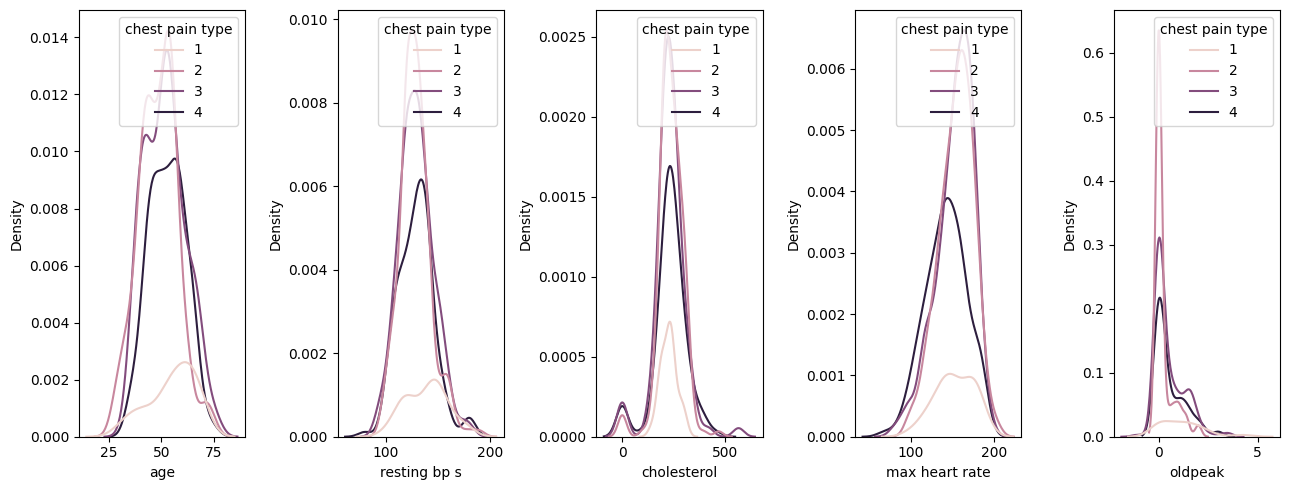

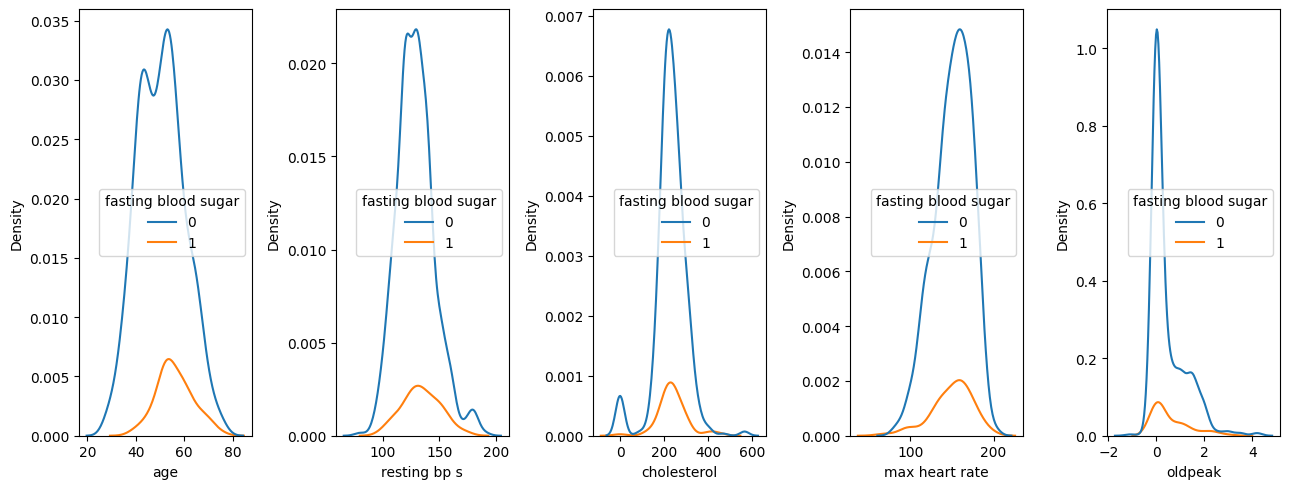

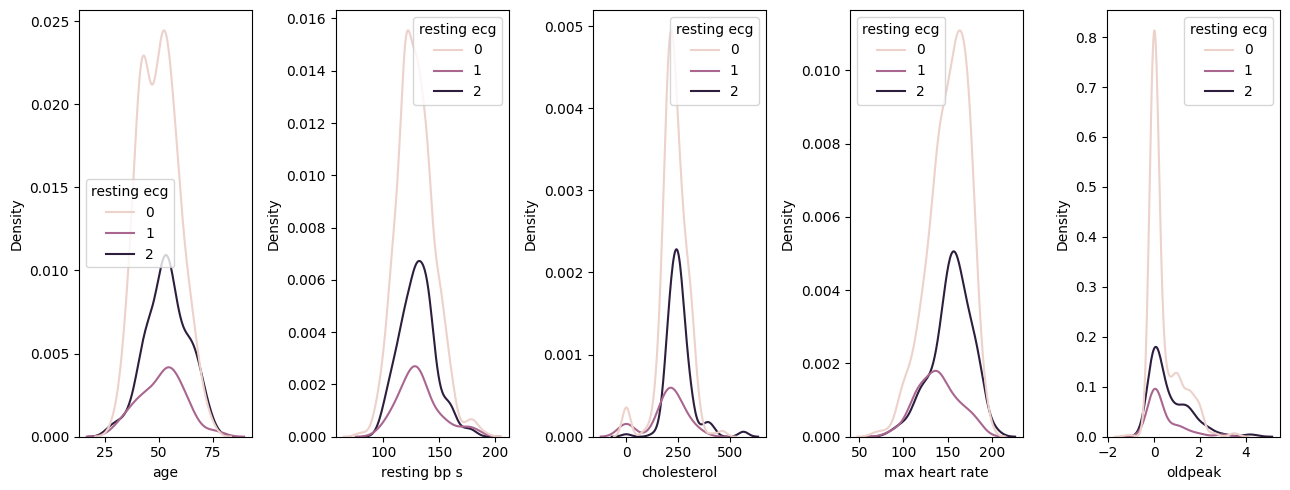

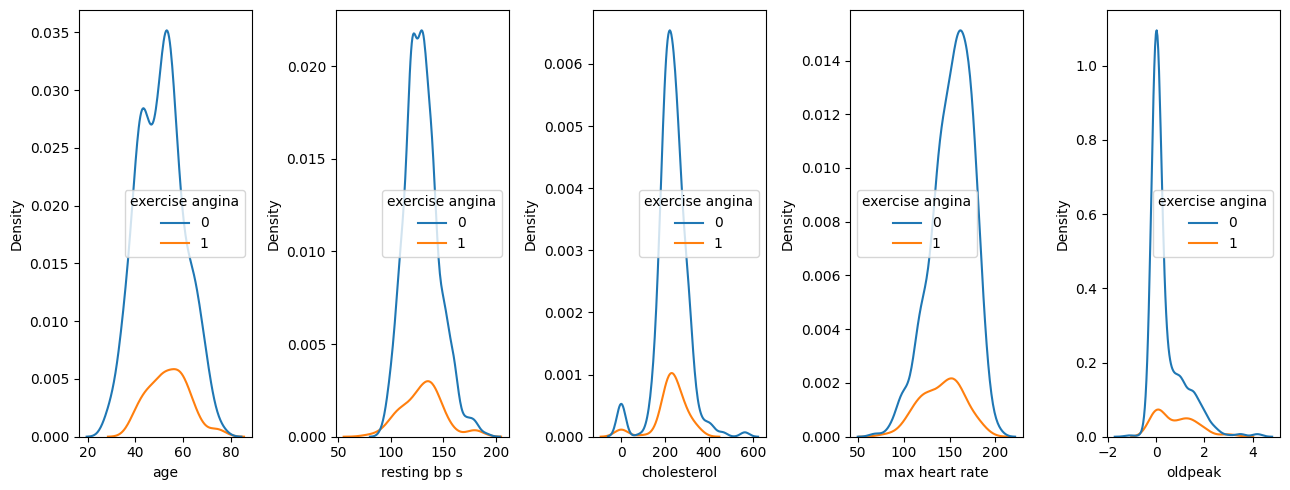

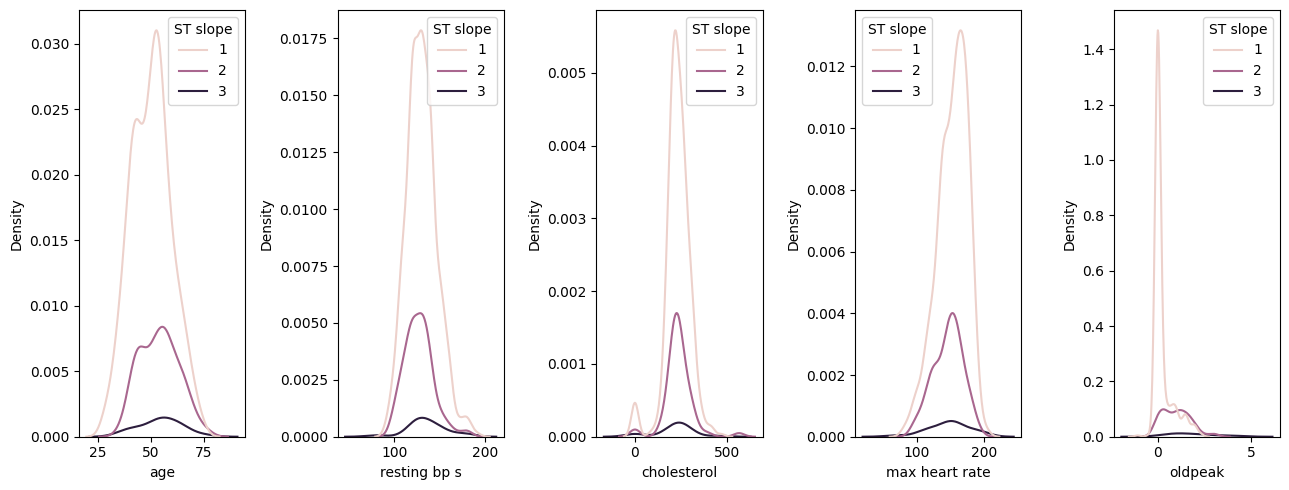

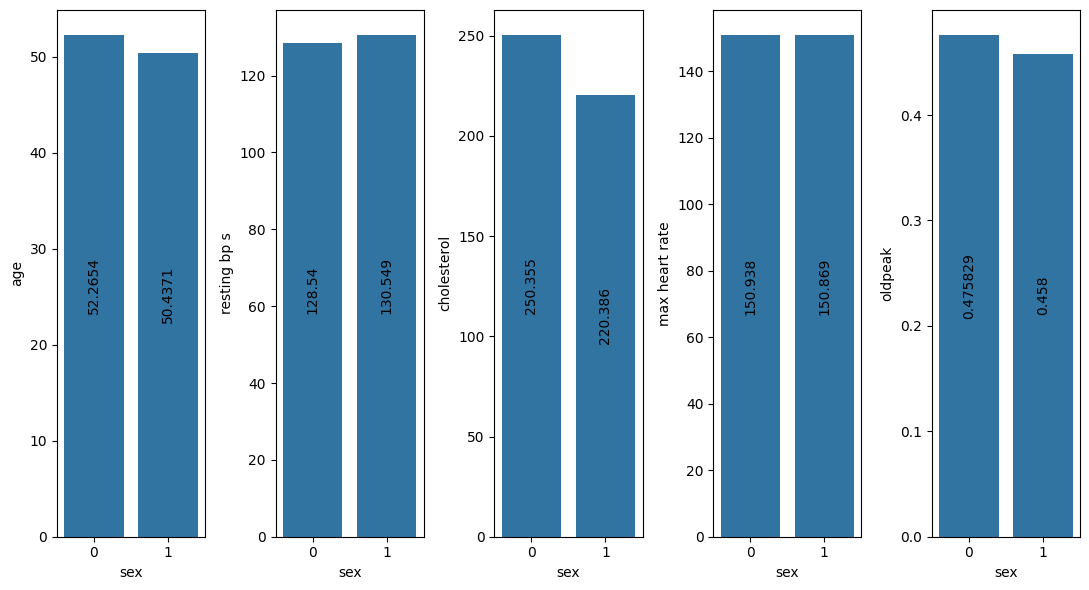

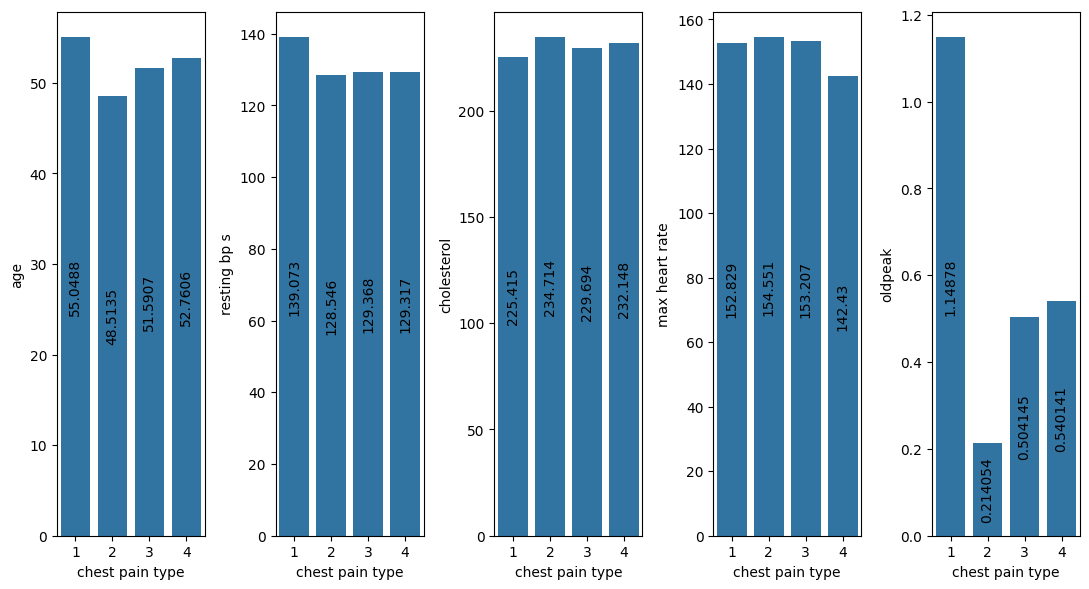

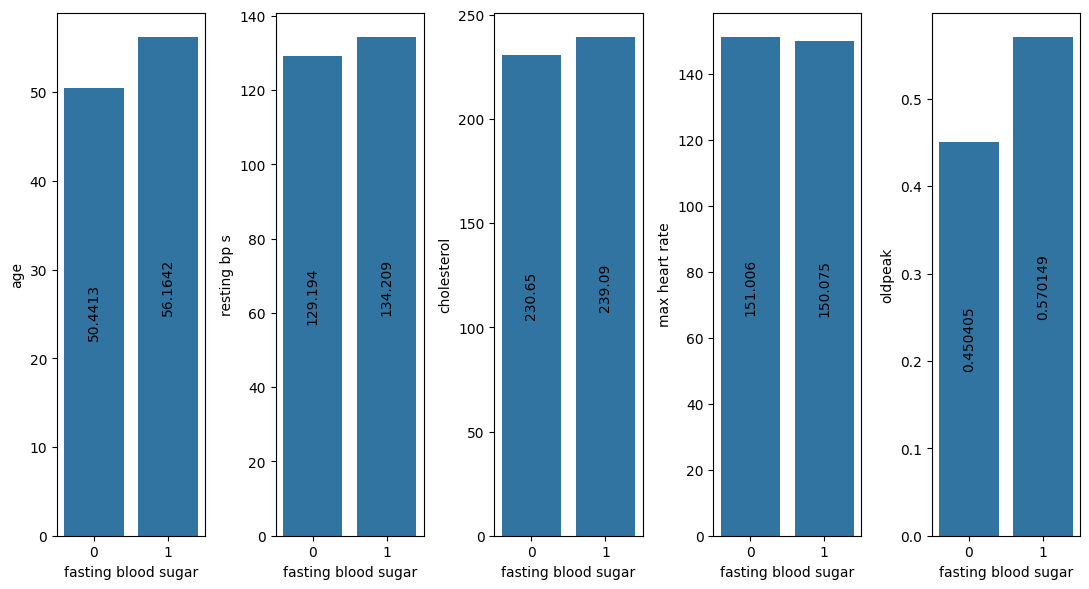

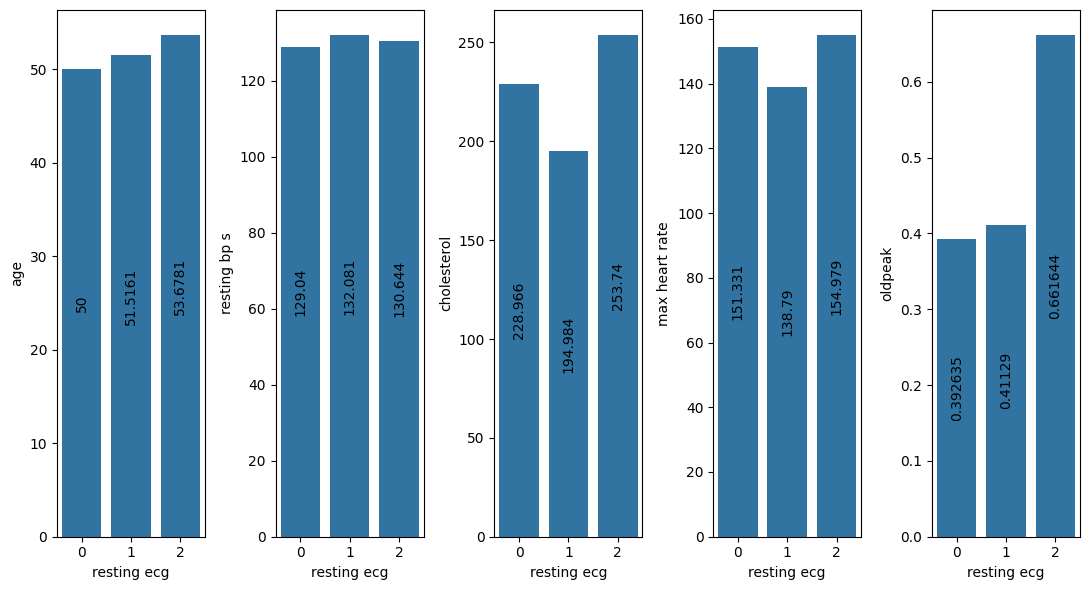

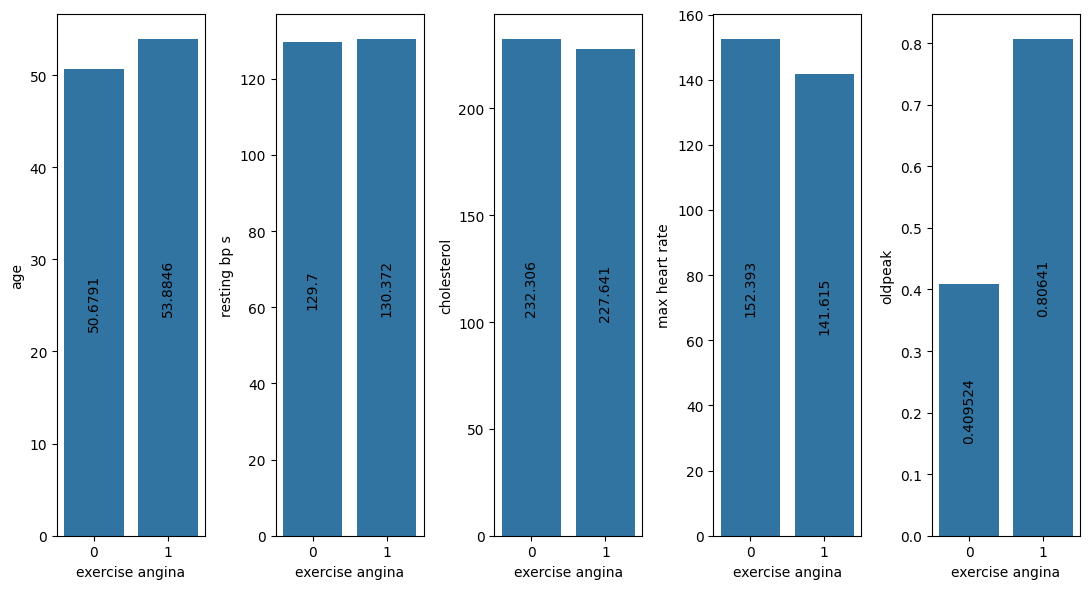

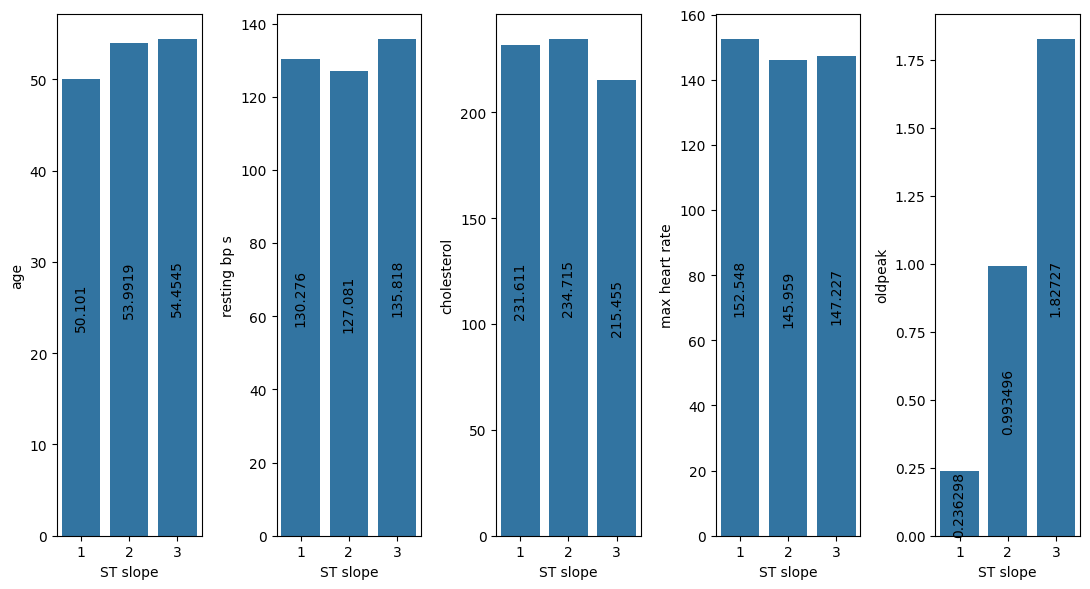

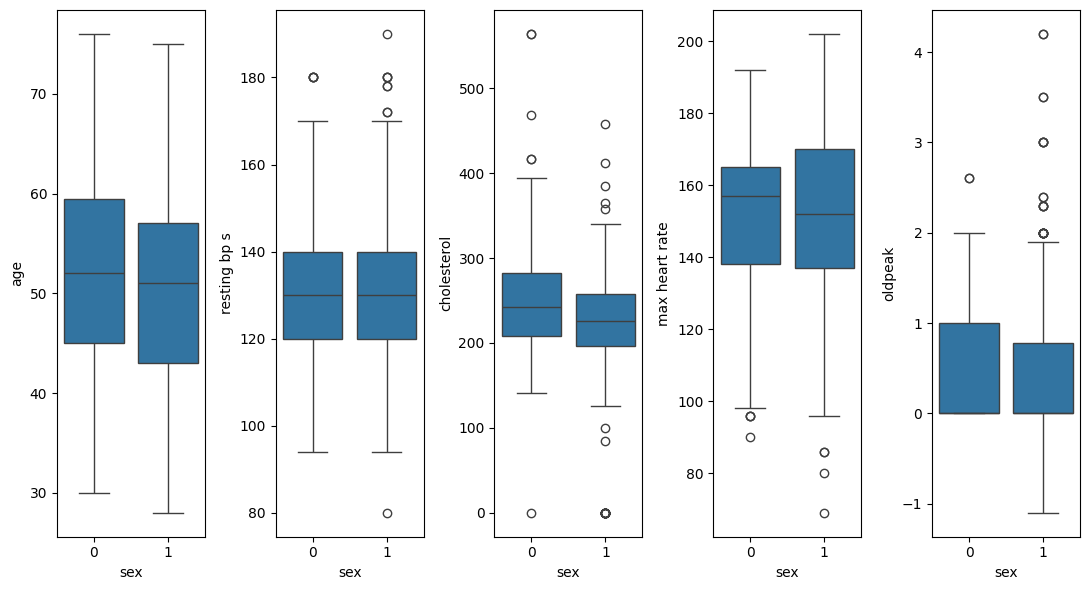

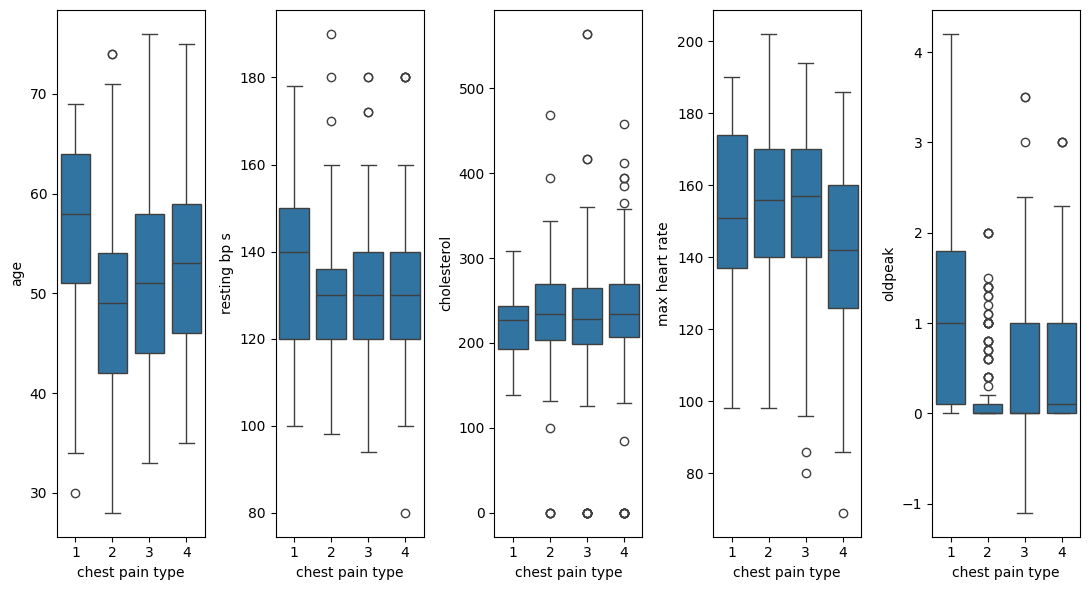

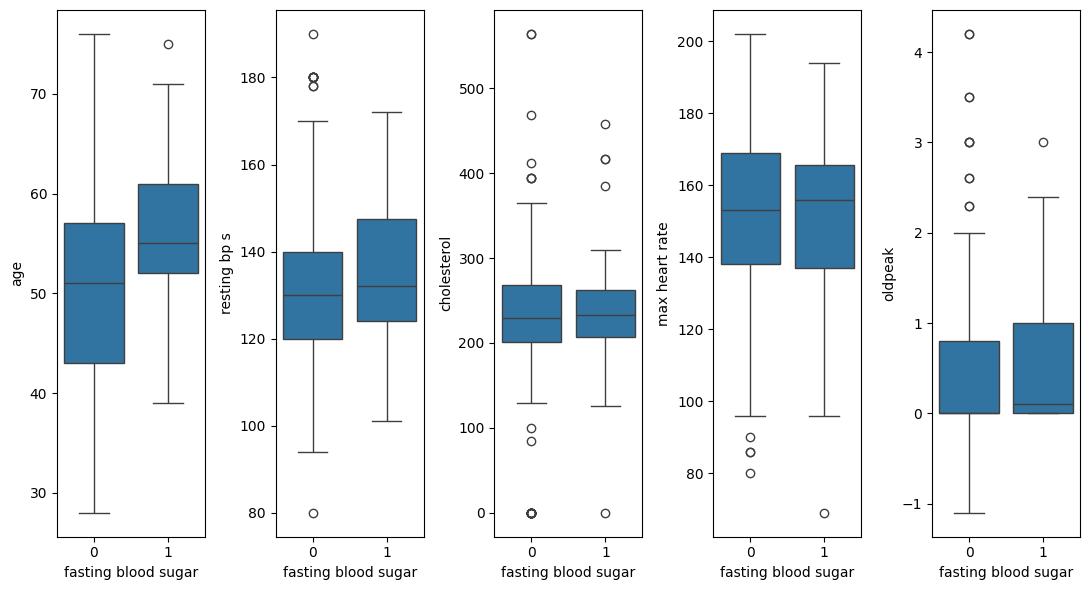

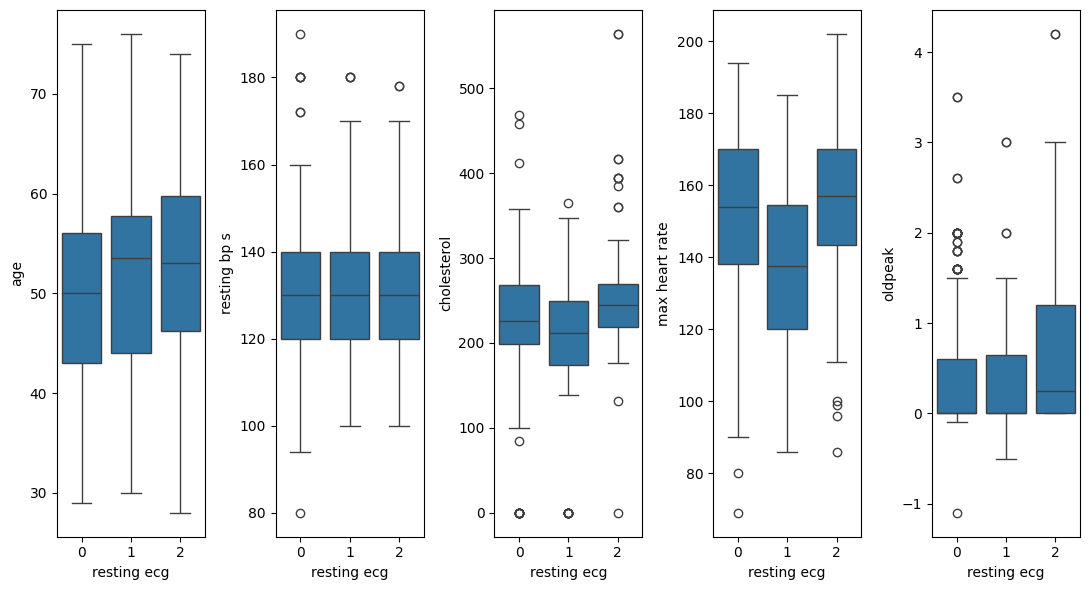

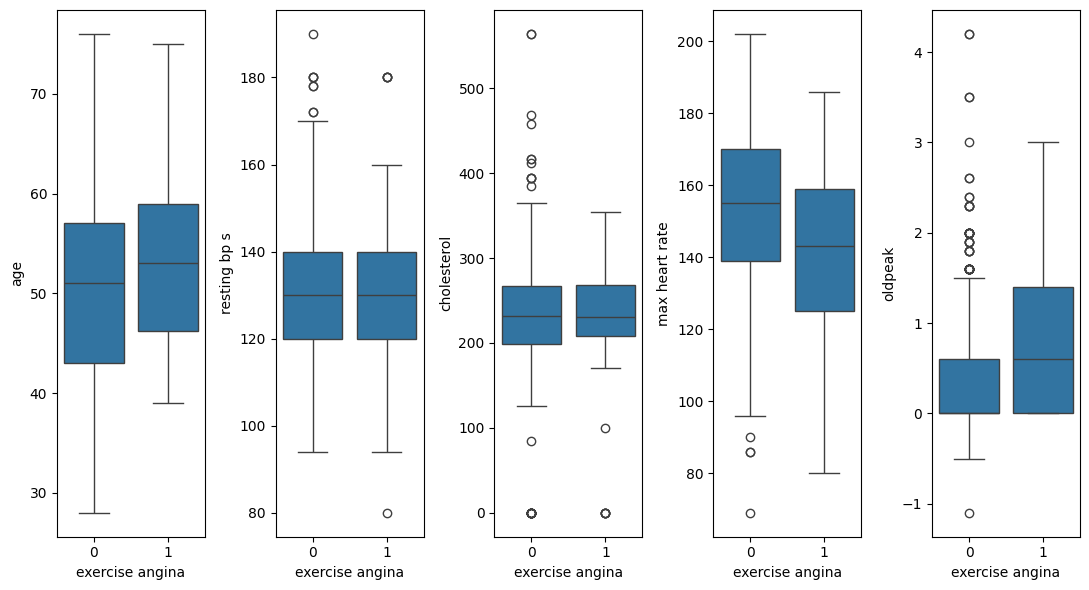

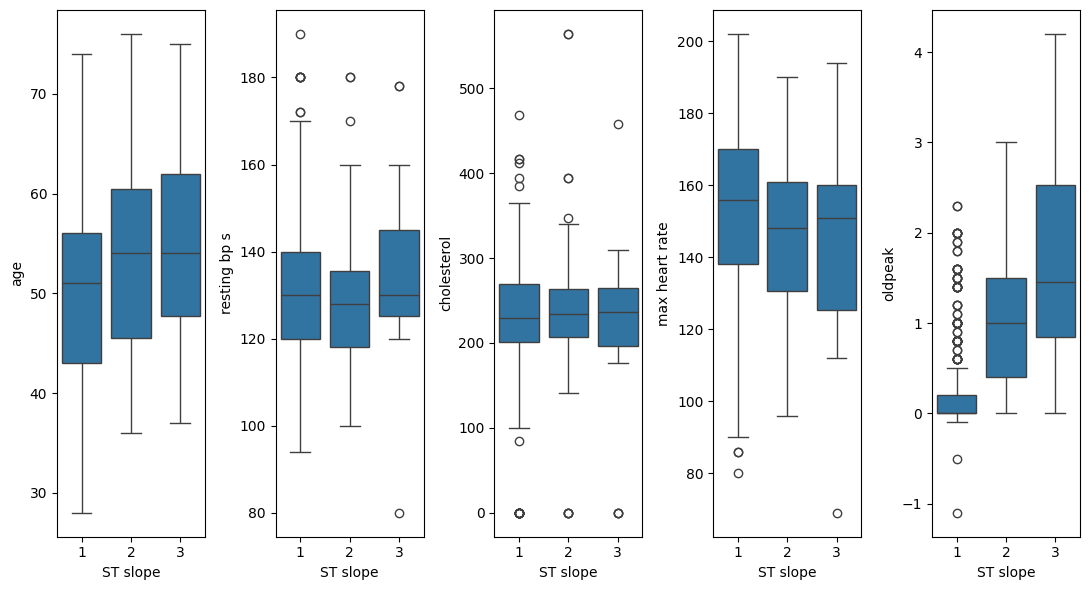

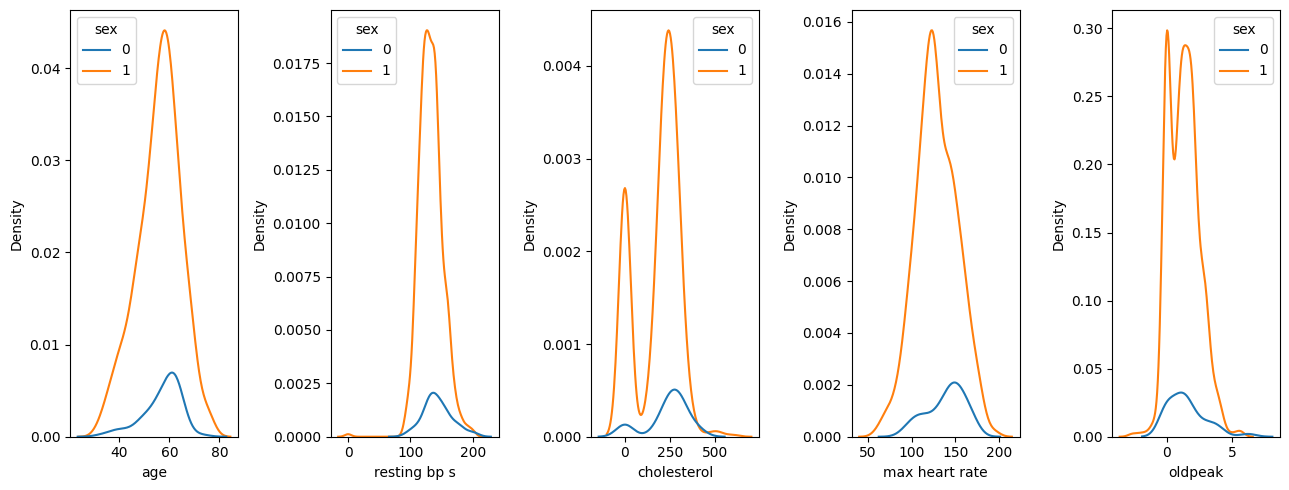

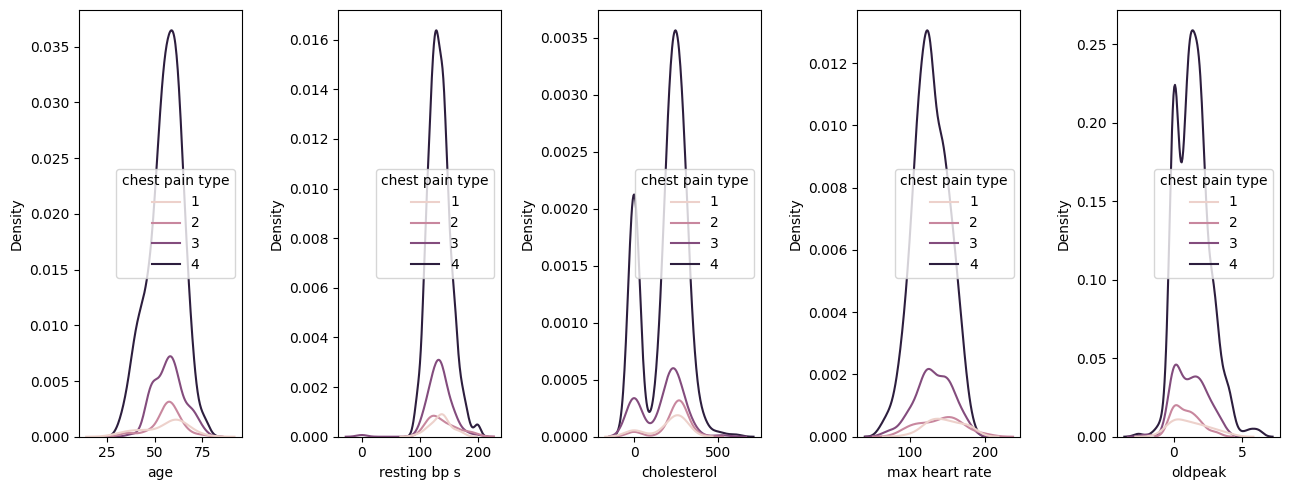

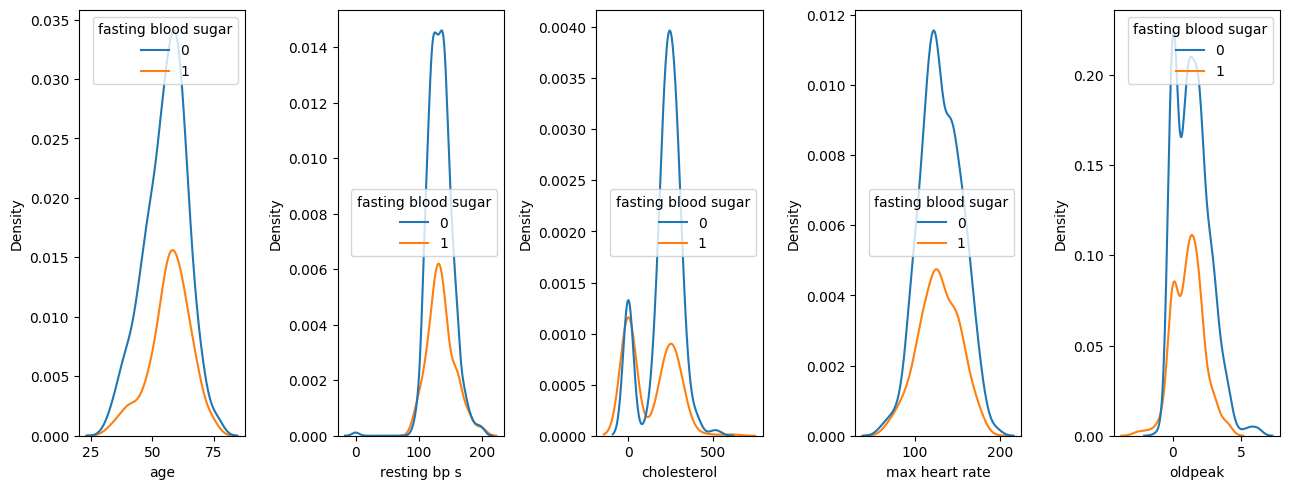

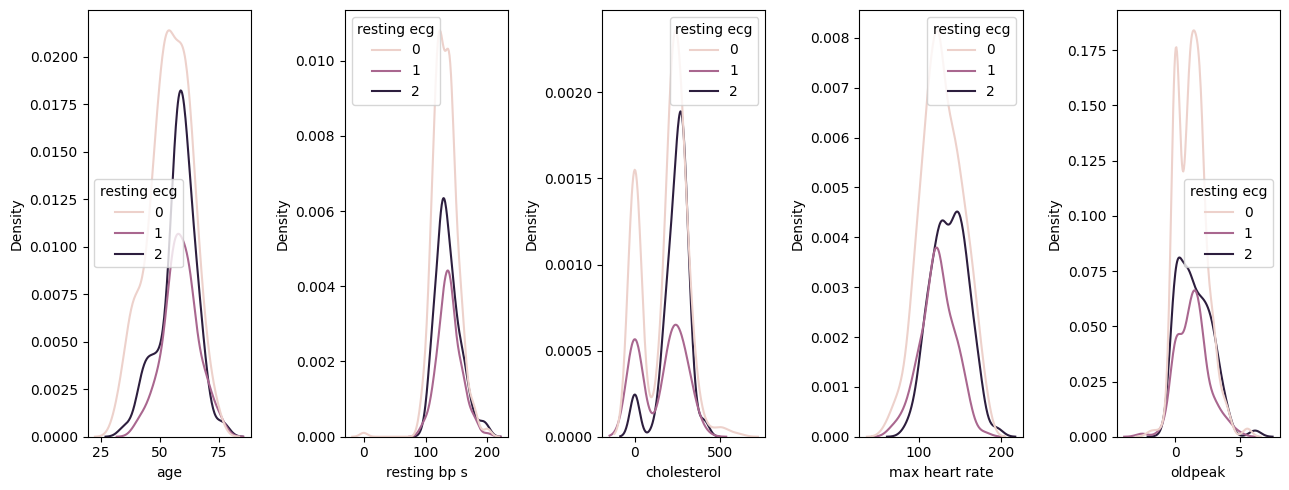

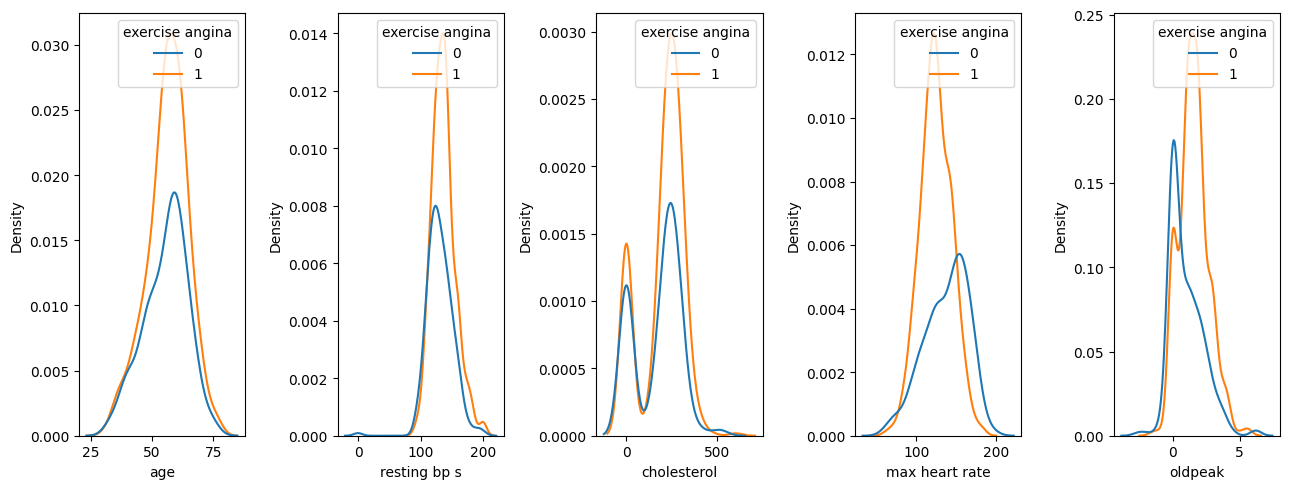

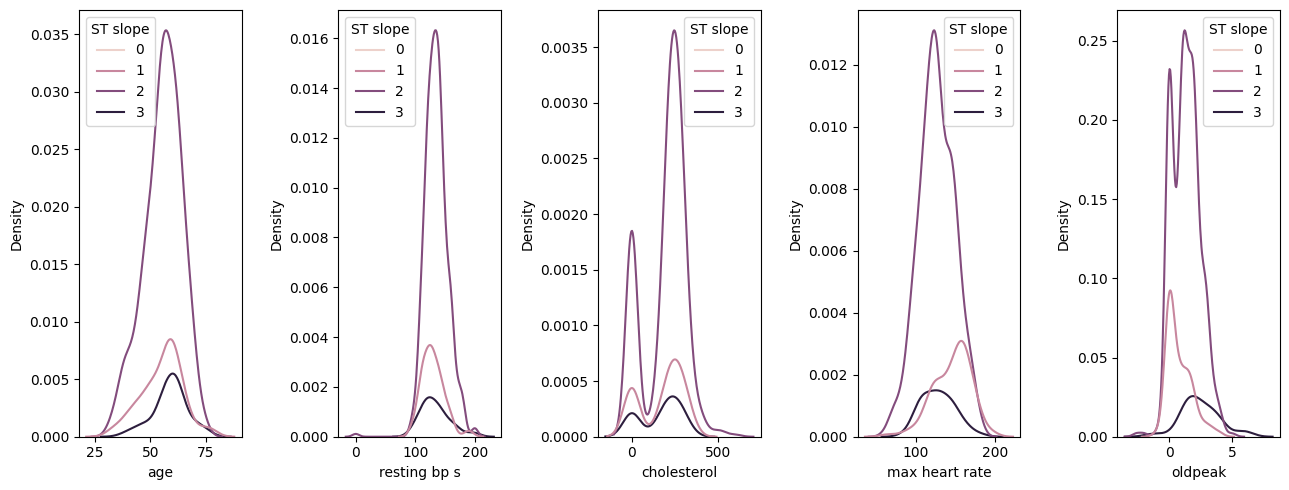

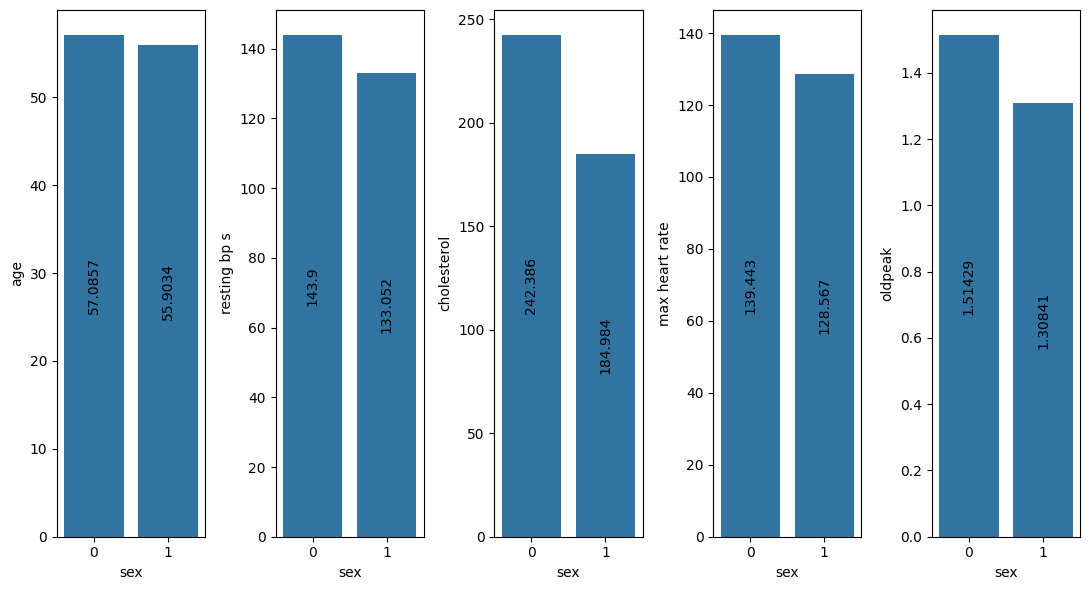

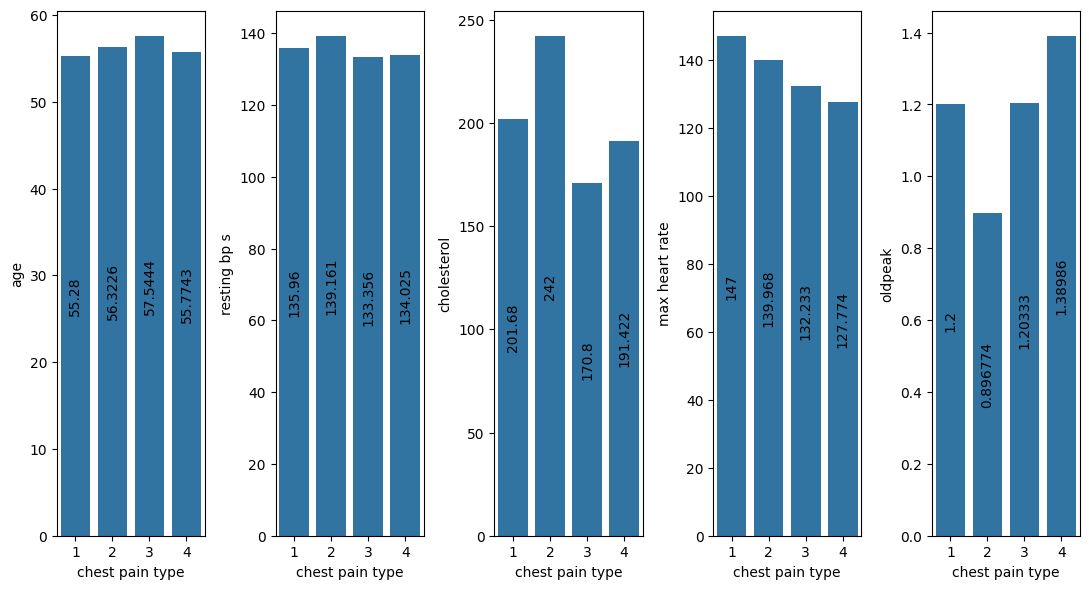

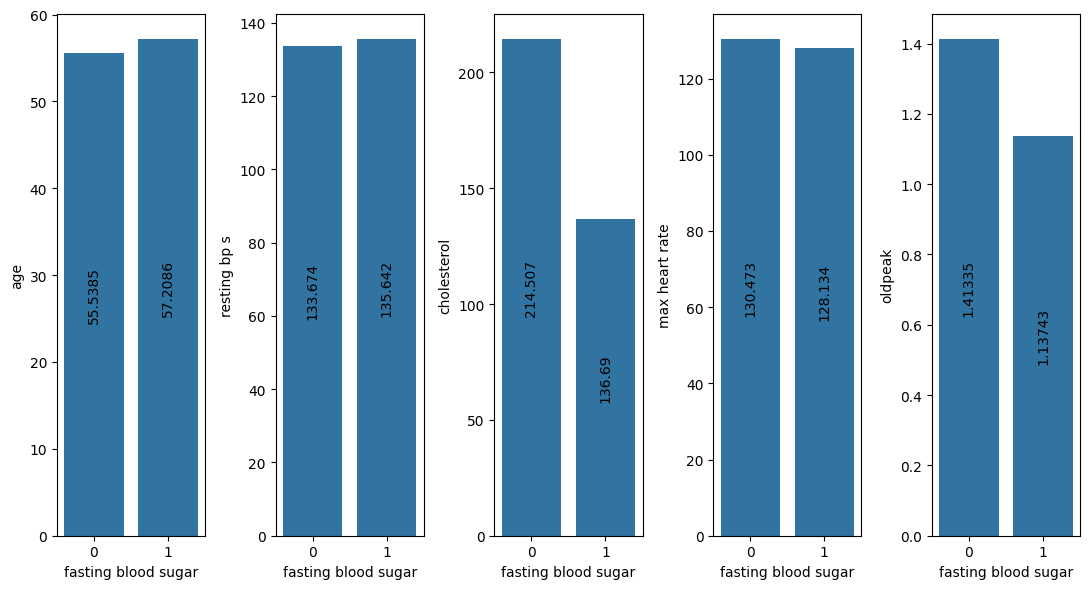

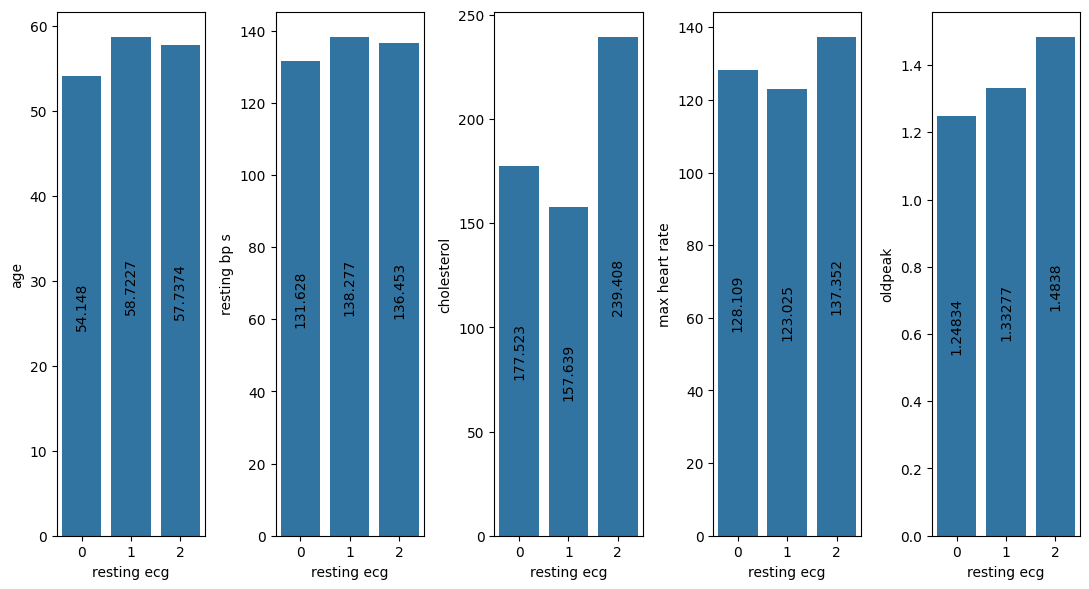

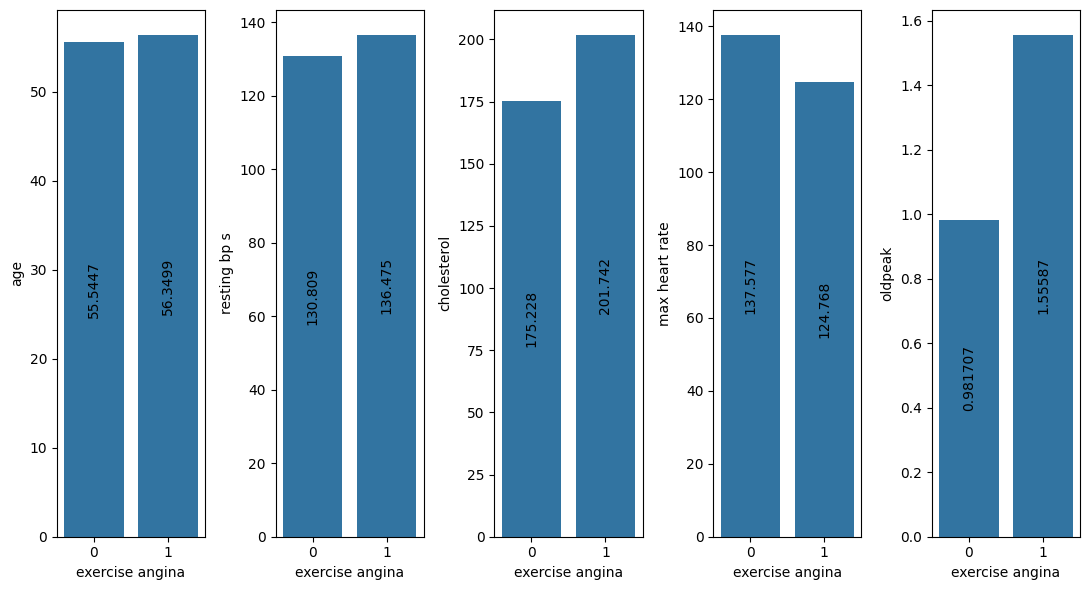

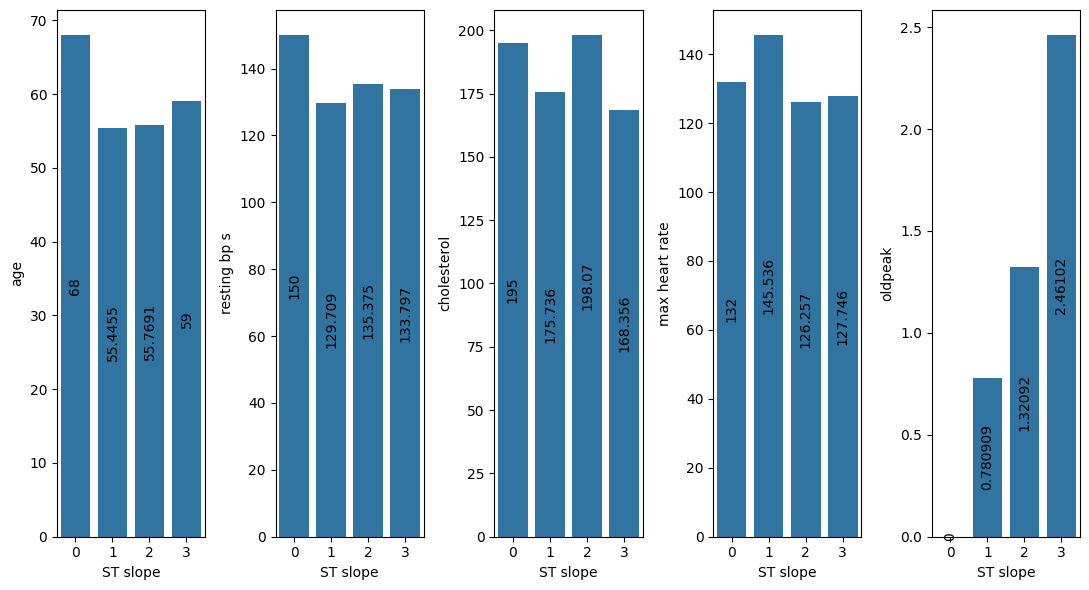

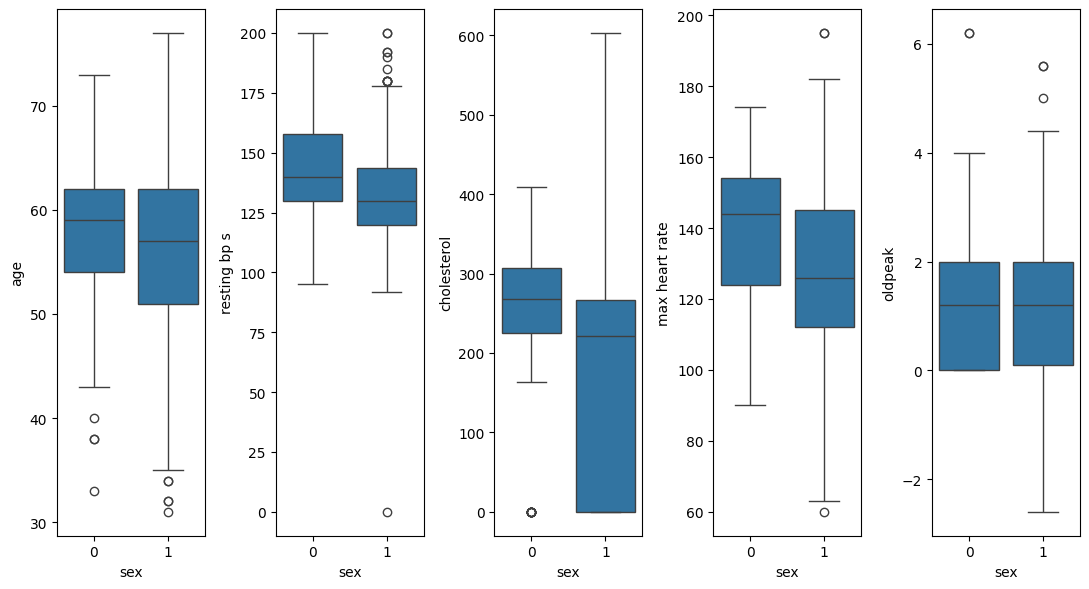

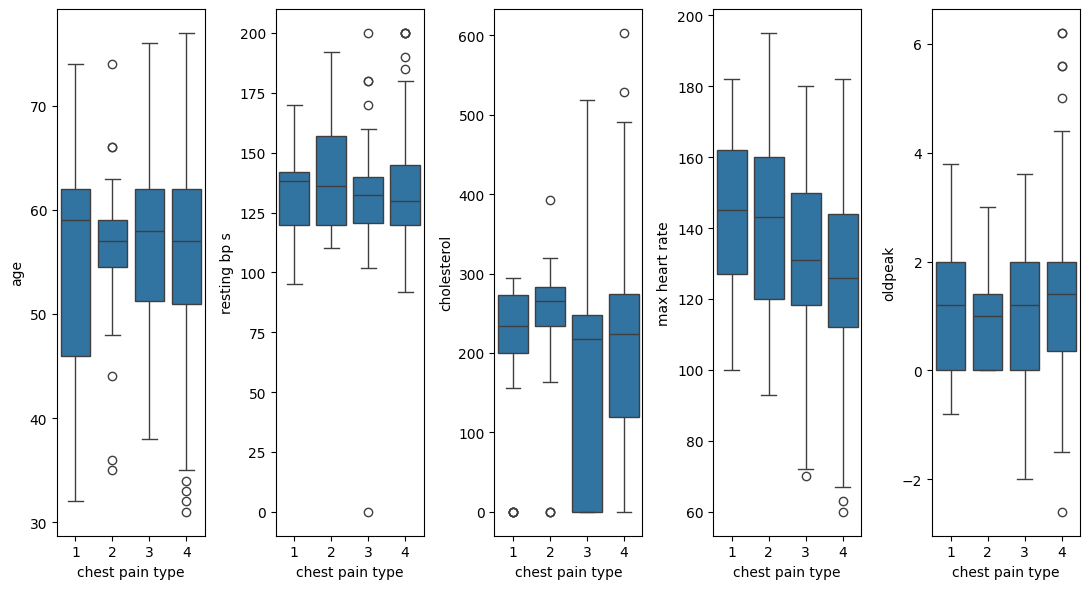

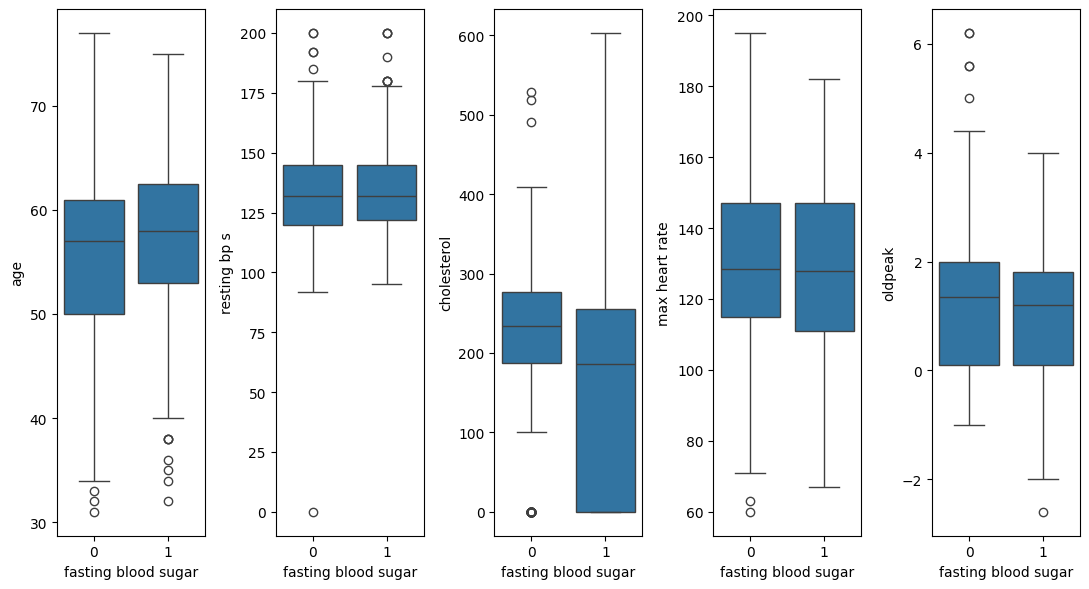

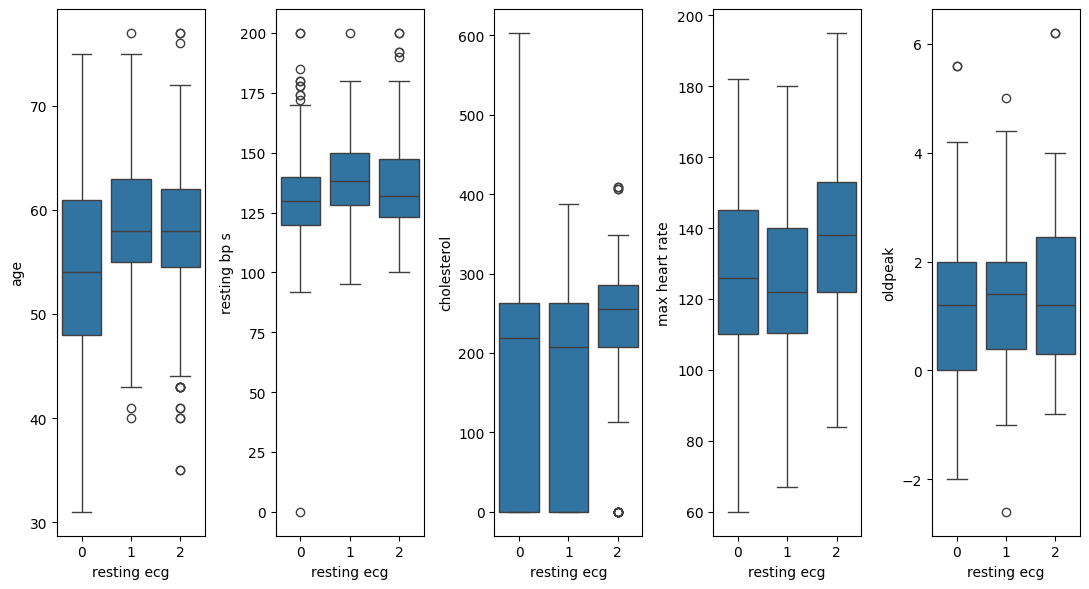

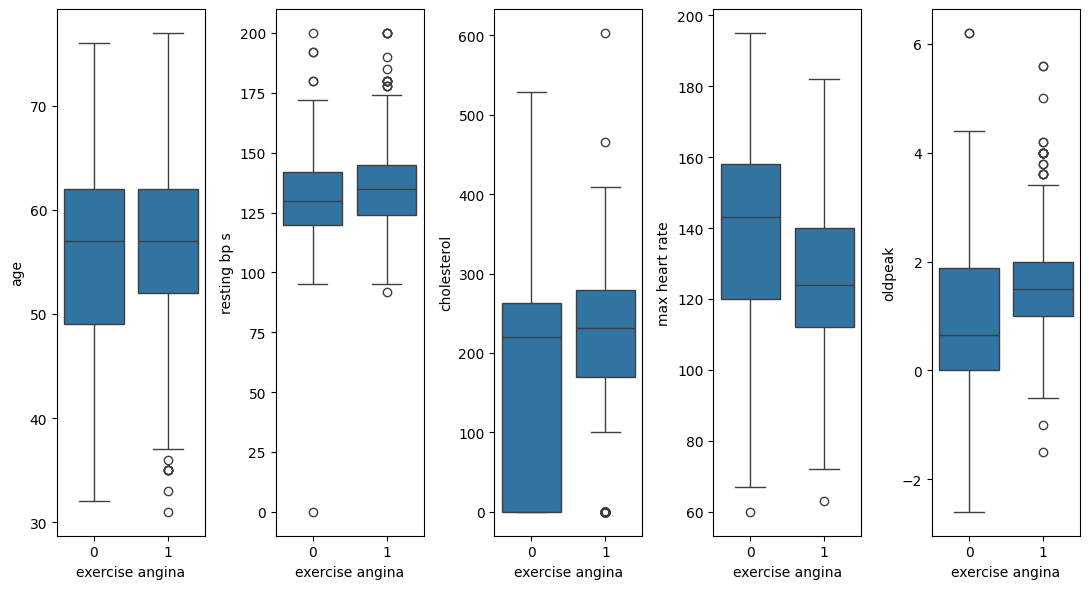

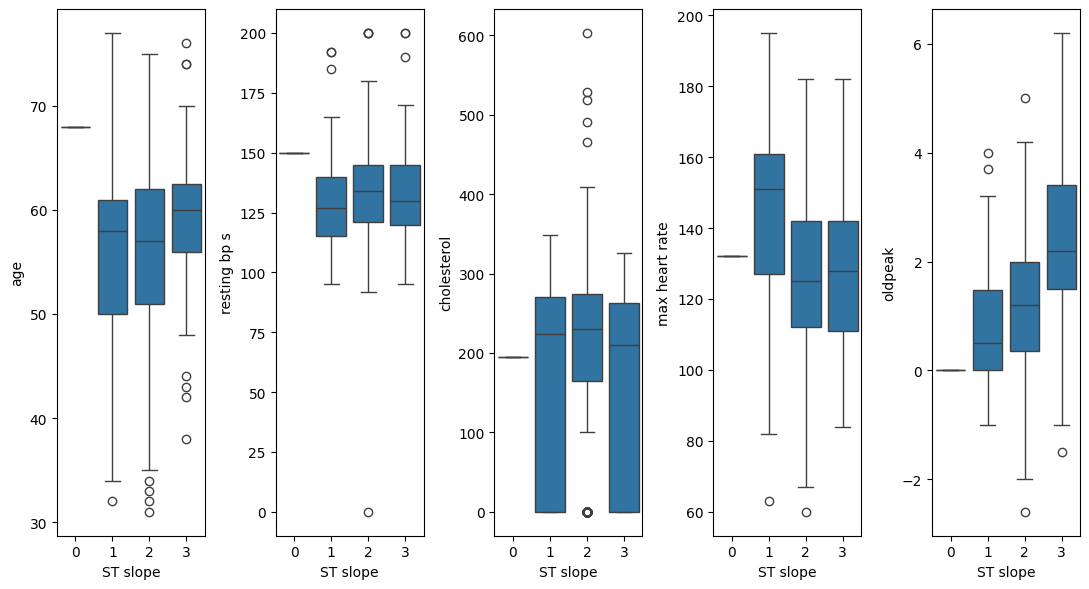

In [15]:
for i in df[df.columns[-1]].unique():
    if i == 0:
        display(HTML("<h1>Kdeplots, barplots, boxplots showing numerical distributions for patients without heart disease</h1>"))
    else:
        display(HTML("<h1>Kdeplots, barplots, boxplots showing numerical distributions for patients with heart disease</h1>"))
    temp_df = df[df[df.columns[-1]] == i]
    for l in categoricals[:-1]:
        display(HTML("<h2>Kdeplot showing numerical densities among patients with {} groups</h2>".format(l)))
        fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(13, 5))
        for j, k in enumerate(numericals):
            sns.kdeplot(temp_df, x=k, hue=l, ax=axes[j])
        plt.tight_layout()
        plt.show()

    for l in categoricals[:-1]:
        display(HTML("<h2>Barplots showing numerical means among patients with {} groups</h2>".format(l)))
        fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(11, 6))
        for j, k in enumerate(numericals):
            plots(temp_df, l, k, axes[j])
        plt.tight_layout()
        plt.show()

    for l in categoricals[:-1]:
        display(HTML("<h2>Boxplots showing numerical outliers and data distributions among patients with {} groups</h2>".format(l)))
        fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(11, 6))
        for j, k in enumerate(numericals):
            sns.boxplot(temp_df, y=k, x=l, ax=axes[j])
        plt.tight_layout()
        plt.show()

In [16]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [19]:
def training(model, name):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    score = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    cm = confusion_matrix(y_test, pred)

    return score*100, report, cm

In [17]:
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
abc = AdaBoostClassifier()
lgr = LogisticRegression()
svc = SVC()
xgb = XGBClassifier()
lgb = LGBMClassifier()

models = [rfc, gbc, etc, abc, lgr, svc, xgb, lgb]

names = ["Random Forest", "Gradient Boosting", "Extra Trees",
        "Ada Boost", "Logistic Regression", "Support Vectors",
        "XGB Classifier", "LGBM Classifier"]

In [20]:
scores, reports, matrices = [], dict(), dict()

for i, j in zip(models, names):
    score, report, matrix = training(i, j)
    scores += [score]
    reports[j] = report
    matrices[j] = matrix

[LightGBM] [Info] Number of positive: 498, number of negative: 454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 952, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.523109 -> initscore=0.092503
[LightGBM] [Info] Start training from score 0.092503


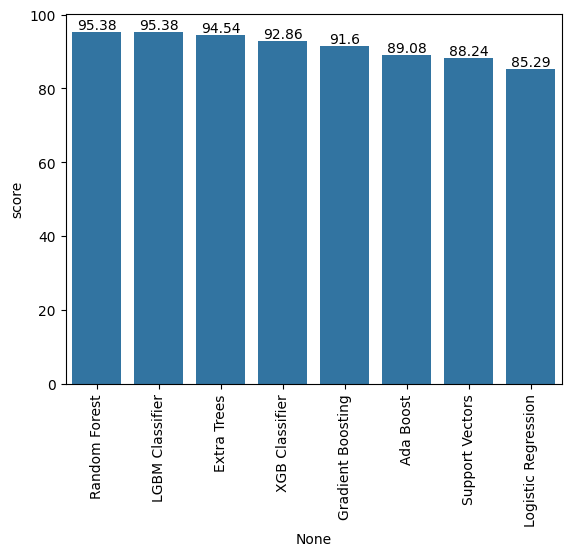

In [21]:
dt = pd.DataFrame({"score": scores}, index=names)
fig, axes = plt.subplots()
dt = dt.sort_values("score", ascending=False)
dt["score"] = round(dt["score"], 2)
sns.barplot(x=dt.index, y=dt.iloc[:, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

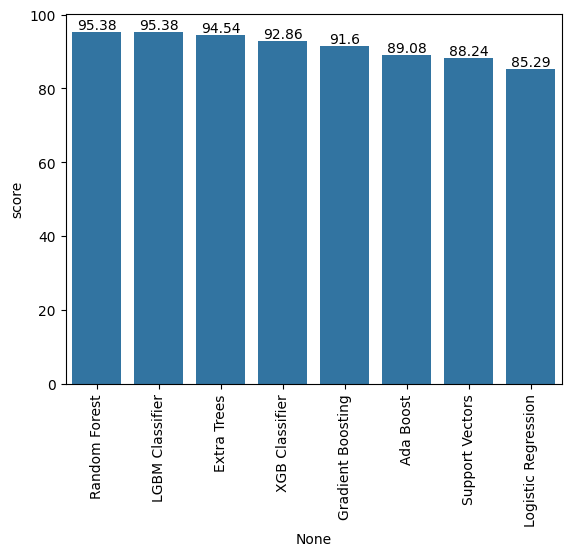

In [22]:
dt = pd.DataFrame({"score": scores}, index=names)
fig, axes = plt.subplots()
dt = dt.sort_values("score", ascending=False)
dt["score"] = round(dt["score"], 2)
sns.barplot(x=dt.index, y=dt.iloc[:, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

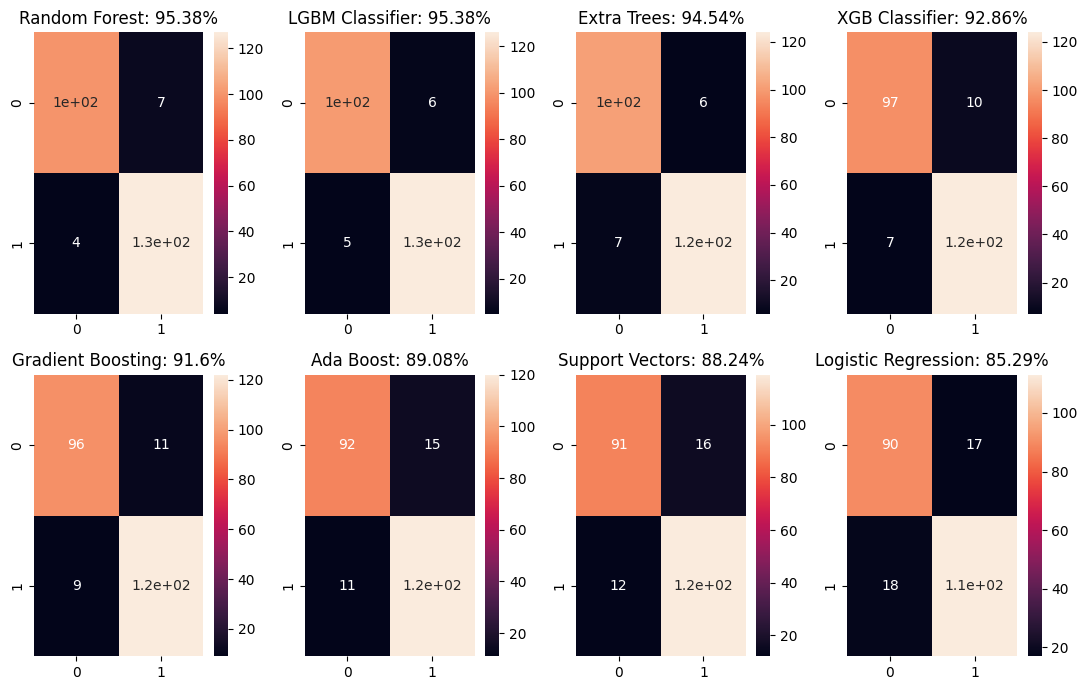

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(11, 7))
index = 0

for i in range(2):
    for j in range(4):
        sns.heatmap(matrices[dt.index[index]], annot=True, ax=axes[i][j])
        axes[i][j].set_title("{}: {}%".format(dt.index[index], dt.iloc[index, 0]))
        index += 1
plt.tight_layout()
plt.show()


In [24]:
for i in dt.index:
    print("*"*30)
    print(i)
    print(reports[i])
    print("\n\n")

******************************
Random Forest
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       107
           1       0.95      0.97      0.96       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238




******************************
LGBM Classifier
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       107
           1       0.95      0.96      0.96       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238




******************************
Extra Trees
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       107
           1       0.95      0.95      0.95       131

    accuracy                           0.